#  Python for Economic and Social Data Science: Lecture Four

---

Lets now run the homework randomiser again, where each randomly selected student will answer some of the homework questions!

## 13 Random Numbers

Everybody is familar with creating random integer numbers without computers. If you roll a die, you create a
random number between 1 and 6. In terms of probability theory, we would call "the rolling of the die" an
experiment with a result from the set of possible outcomes {1, 2, 3, 4, 5, 6}. It is also called the sample space of the experiment. How can we simulate the rolling of a die in Python? We don't need Numpy for this aim.  Python's standard library has a `random' module which is more than enough.

In [3]:
import random
random.randint(1,6)

3

Random is very powerful. Say we want to choose over a list of foods to eat; we can use the `choice` module from it:

In [5]:
from random import choice
weather = ["sunny", "rainy"]
print("The weather in Xi'an on Saturday is going to be : ", random.choice(weather))

The weather in Xi'an on Saturday is going to be :  rainy


We can also use `random' to draw random samples for us:

In [80]:
print(random.sample(range(1, 10), 5))

[4, 2, 1, 3, 7]


### 13.1 Random and control statements

We can also effectively use random numbers in our control statements:

In [86]:
sample = 1
while sample>0:
    sample = random.sample(range(-1, 10), 1)[0]
    if sample > 0: print(sample)
    else: print('Were leaving! Negative number found!')

9
Were leaving! Negative number found!


### 13.2 The role of random.seed()

In [109]:
import random
random.seed(4321)
for _ in range(10):
    print(random.randint(1, 10), end=", ")
print("\nLet's create the same random numbers again:")
random.seed(42)
for _ in range(10):
    print(random.randint(1, 10), end=", ")

5, 1, 7, 2, 3, 6, 2, 1, 3, 10, 
Let's create the same random numbers again:
2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 

What happens if we don't re-set the random.seed() parametre?

In [114]:
import random
random.seed(42)
#set.seed(123)
for _ in range(10):
    print(random.randint(1, 10), end=", ")
print('\nAre these new numbers the same?')

for _ in range(10):
    print(random.randint(1, 10), end=", ")

2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 
Are these new numbers the same?
7, 1, 1, 2, 4, 4, 9, 10, 1, 9, 

### 13.3 Random Normal and other distributions

The code in the cell above _uniformly_ selects numbers within the specified range. What about if we want to generate numbers from other statistical distributions using random? Lets see three examples:

#### 13.3.1 Uniform Distribution

The uniform distribution generates random numbers that are evenly distributed within a specified range:

In [115]:
# Generate 10 random numbers uniformly distributed between 0 and 1
uniform_dist = [random.uniform(0, 1) for _ in range(10)]
print("Uniform Distribution:", uniform_dist)

Uniform Distribution: [0.1988376506866485, 0.6498844377795232, 0.5449414806032167, 0.2204406220406967, 0.5892656838759087, 0.8094304566778266, 0.006498759678061017, 0.8058192518328079, 0.6981393949882269, 0.3402505165179919]


#### 13.3.2. Normal (Gaussian) Distribution

The normal distribution generates random numbers that follow a bell curve, characterized by a mean (mu) and a standard deviation (sigma).

In [135]:
mu = 0  # Mean
sigma = 1  # Standard deviation
random.seed(1)
# Generate 10 random numbers from a normal distribution
normal_dist = [random.gauss(mu, sigma) for _ in range(10)]
print("Normal Distribution:", normal_dist)

Normal Distribution: [1.2881847531554629, 1.449445608699771, 0.06633580893826191, -0.7645436509716318, -1.0921732151041414, 0.03133451683171687, -1.022103170010873, -1.4368294451025299, 0.19931197648375384, 0.13337460465860485]


#### 13.3.3. Exponential Distribution

The exponential distribution generates random numbers with a specified rate parameter (lambda), often used to model time between events.

In [140]:
lambda_param = 1

# Generate 10 random numbers from an exponential distribution
exponential_dist = [random.expovariate(lambda_param) for _ in range(10)]
print("Exponential Distribution:", exponential_dist)

Exponential Distribution: [0.3614987181283459, 0.8857145011350663, 2.141138245041168, 1.8720854367999216, 0.7037710557639842, 0.8891675583758154, 0.035135930605920594, 0.2780485885458307, 1.5965426526109348, 0.5349714680002495]


#### 13.4 Numpy vs. Random

We can draw random numbers using numpy, too!

In [6]:
import numpy as np
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate 10 random numbers from a normal distribution
normal_dist = np.random.normal(mu, sigma, 10)
print("Normal Distribution:", normal_dist)

Normal Distribution: [ 0.00301203  0.27921762  1.2340974  -0.31990955 -0.09375917 -2.16620356
  0.6379348  -0.53650419 -0.02359928 -0.84381358]


#### 13.4.1 Explanation of Why numpy is Better than random for Certain Tasks

**Performance:**

* numpy is designed for numerical and scientific computing. It is implemented in C, which makes it much faster than Python's built-in random module, especially when generating large arrays of random numbers.
* For example, generating a large number of random samples using numpy is significantly faster than using the random module in a loop.

**Convenience:**

* numpy provides a more convenient and efficient interface for generating random numbers from various distributions. With numpy, you can generate arrays of random numbers directly, without the need for list comprehensions or loops.
* numpy offers a wide range of random number generation functions, including those for more complex distributions, which may not be available in the random module.

**Integration with Arrays:**

* numpy's random number generation functions integrate seamlessly with numpy arrays, making it easier to perform further numerical operations and analysis on the generated data.
* Operations on numpy arrays are typically faster and more memory-efficient compared to operations on Python lists.

**Consistency and Reproducibility:**

* numpy provides better support for setting and using random seeds, which is important for reproducible results in scientific experiments and simulations.
* The numpy.random module offers a consistent interface for generating random numbers across different distributions, making it easier to switch between different types of random sampling.

Let's compare generating 100,000,000 random numbers from a normal distribution using both numpy and the random module to highlight the performance difference:

In [7]:
import numpy as np
import random
import time

# Parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Using numpy
start_time = time.time()
normal_dist_np = np.random.normal(mu, sigma, 1000000-0)
end_time = time.time()
print("Numpy time:", end_time - start_time)

# Using random
start_time = time.time()
normal_dist_random = [random.gauss(mu, sigma) for _ in range(10000000)]
end_time = time.time()
print("Random time:", end_time - start_time)

Numpy time: 0.16092181205749512
Random time: 2.872779369354248


### Section 13.10 Your turn!

Generate a thousand draws from a np.random.normal. Generate another thousand. Are they they same, or are they different? Is there a Boolean way to check?

## 14 Getting data from the internet

### 14.1 Data on the internet

There are lots of ways to get data from the internet. We're now going to see some examples of them using Python (and later, by reading files in directly with Pandas inbuilt request functionality.

THe three main types of data that we get from the internet are:

1. Information from a simple API which serves up something similar to .json (i.e. dictionary) data
2. Pictures
3. Raw HTML which can be parsed using an advanced library called Beautiful Soup
4. Existing, curated datasets hosted online.

Lets go through each of them one by one, introducing key terms as we go.

### 14.2 Introducing Requests

Let's start with these basics.

#### 14.2.1. Making a Simple GET Request

This example demonstrates how to make a GET request to a URL and get the response.

Explanation:

* `requests.get('https://api.github.com')` sends a GET request to the specified URL.
* The response object contains the server's response to the HTTP request.

In [8]:
import requests

# Make a GET request to a website
response = requests.get('https://api.github.com')

# Print the response
response #this on its own is not super helpful or useful as it is.

<Response [200]>

In [9]:
type(response)

requests.models.Response

#### 14.2.2 Checking the Status Code of the Response

This example shows how to check the status code of the response to see if the request was successful.

Explanation:

* `response.status_code` returns the HTTP status code of the response (e.g., 200 for success).

In [13]:
status_code = response.status_code
print(f'Status Code: {status_code}')

Status Code: 200


#### 14.2.3. Retrieving and Displaying the Content of the Response

This example demonstrates how to retrieve and print the content of the response.

Explanation:

* `response.text` returns the content of the response in Unicode.

In [14]:
# Retrieve and display the content of the response
content = response.text

# Print the content
print(f'Content:\n{content}')

Content:
{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","commit_search_url":"https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","la

#### 14.4.2. Parsing JSON Data from the Response

This example shows how to parse JSON data from the response.

Explanation:

* `response.json()` parses the response content as JSON and returns a dictionary.

In [15]:
json_data = response.json()

# Print the JSON data
print('JSON Data:', json_data)

JSON Data: {'current_user_url': 'https://api.github.com/user', 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}', 'authorizations_url': 'https://api.github.com/authorizations', 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}', 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}', 'emails_url': 'https://api.github.com/user/emails', 'emojis_url': 'https://api.github.com/emojis', 'events_url': 'https://api.github.com/events', 'feeds_url': 'https://api.github.com/feeds', 'followers_url': 'https://api.github.com/user/followers', 'following_url': 'https://api.github.com/user/following{/target}', 'gists_url': 'https://api.github.com/gists{/gist_id}', 'hub_url': 'https://api.github.com/hub', 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}', 'issues_url': 'https://api.github.com/issues', 'keys_url': 'http

#### 14.2.5 Handling Errors
This example shows how to handle errors using try-except blocks.

Explanation:

* `response.raise_for_status()` raises an HTTPError if the HTTP request returned an unsuccessful status code.
The try-except block catches and handles these errors gracefully.

In [16]:
try:
    response = requests.get('https://api.github.com/invalid-endpoint')
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
except requests.exceptions.HTTPError as err:
    print(f'HTTP error occurred: {err}')
except Exception as err:
    print(f'Other error occurred: {err}')
else:
    print('Success!')

HTTP error occurred: 404 Client Error: Not Found for url: https://api.github.com/invalid-endpoint


#### 14.2.6 Sending Query Parameters

This example shows how to send a GET request with query parameters.

Explanation:

* `params` is a dictionary containing the query parameters.
* `requests.get(url, params=params)` sends the GET request with the specified parameters.
* `response.url` prints the URL with the query parameters appended.

In [17]:
# Define the URL and parameters
url = 'https://api.github.com/search/repositories/18072024'
params = {'q': 'requests+language:python'}

# Send the GET request
response = requests.get(url, params=params)

# Print the URL with parameters
print(f'URL: {response.url}')

URL: https://api.github.com/search/repositories?q=requests%2Blanguage%3Apython


In [18]:
# Print the JSON response
json_data = response.json()
print('JSON Data:', json_data)

JSON Data: {'total_count': 201, 'incomplete_results': False, 'items': [{'id': 33210074, 'node_id': 'MDEwOlJlcG9zaXRvcnkzMzIxMDA3NA==', 'name': 'secrules-language-evaluation', 'full_name': 'SpiderLabs/secrules-language-evaluation', 'private': False, 'owner': {'login': 'SpiderLabs', 'id': 508521, 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjUwODUyMQ==', 'avatar_url': 'https://avatars.githubusercontent.com/u/508521?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/SpiderLabs', 'html_url': 'https://github.com/SpiderLabs', 'followers_url': 'https://api.github.com/users/SpiderLabs/followers', 'following_url': 'https://api.github.com/users/SpiderLabs/following{/other_user}', 'gists_url': 'https://api.github.com/users/SpiderLabs/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/SpiderLabs/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/SpiderLabs/subscriptions', 'organizations_url': 'https://api.github.com/users/SpiderLabs/orgs', 'repos_url': 'https://

#### 14.2.7 Custom Headers

This example demonstrates how to send custom headers with your request.

Explanation:

* `headers` is a dictionary containing the custom headers.
* `requests.get(url, headers=headers)` sends the GET request with the specified headers.

In [19]:
# Define the URL and headers
url = 'https://api.github.com'
headers = {'User-Agent': 'charlierahal@gmail.com'}

# Send the GET request with custom headers
response = requests.get(url, headers=headers)

# Print the status code and headers of the response
print(f'Status Code: {response.status_code}')
print('Response Headers:', response.headers)

Status Code: 200
Response Headers: {'Date': 'Sun, 14 Jul 2024 10:52:57 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept,Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"4f825cc84e1c733059d46e76e6df9db557ae5254f9625dfe8e1b09499c449438"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-wh

### 14.3 Downloading a dataset

The example above is a little bit obtuse, and not _hyper_ useful for research. It does, however, show us how to use requests in a complete way. Below we now show how to use requests to get an actual dataset.

#### 14.3.1. Import Necessary Libraries

First, we'll import the required libraries: requests for downloading the file.


In [20]:
import requests

#### 14.3.2. Define the URL of the Dataset
We'll define the URL from which we want to download the Wine Quality dataset.

In [11]:
# URL of the dataset (red wine quality)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

#### 14.3.3. Make a GET Request to Download the File

We'll make a GET request to the URL and save the content of the response.

Explanation:

* `requests.get(url)` sends a GET request to the specified URL.
* We check the status_code of the response to ensure the request was successful (status code 200).

In [12]:
# Make a GET request to download the file
response = requests.get(url)

# Check the status code to ensure the request was successful
if response.status_code == 200:
    print('Download successful!')
else:
    print(f'Failed to download. Status code: {response.status_code}')

Download successful!


#### 14.3.4. Save the Content to a CSV File
We'll save the content of the response to a CSV file on our local system.

Explanation:

* `response.content` contains the binary content of the response.
* We open a file in write-binary mode ('wb') and write the content to it.

In [14]:
# Define the path where we want to save the file
file_path = '../Data/winequality-red.csv'

# Save the content to a file
with open(file_path, 'wb') as file:
    file.write(response.content)

print(f'File saved to {file_path}')

File saved to ../Data/winequality-red.csv


#### 14.3.5. Read the CSV File with open()
We'll use Python's built-in open() function to read the content of the CSV file and print it.

Explanation:

* We open the CSV file in read mode ('r').
* `file.read()` reads the entire content of the file.
* We print the first 500 characters of the content for brevity.

In [15]:
# Read the CSV file with open()
with open(file_path, 'r') as file:
    content = file.read()

# Print the content of the file
print('File content:')
print(content[:500])  # Print the first 500 characters for brevity

File content:
"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59


What can we see from the first 500 characters of this file? Note: we'll later learn how to read this in with pandas; both from disk, and directly from the internet.

## 14.4 Downloading and displaying images

Download successful!


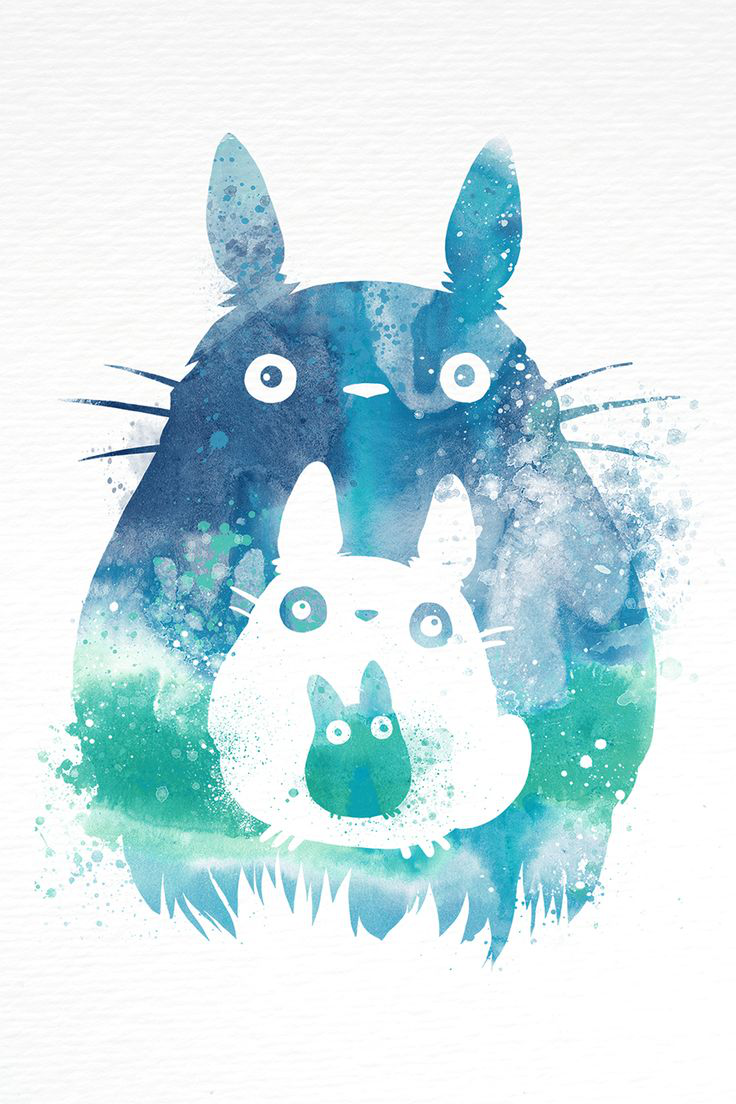

In [25]:
import requests
from PIL import Image
from IPython.display import display
from io import BytesIO

# URL of the image
url = 'https://artfiles.alphacoders.com/865/86563.jpg'

# Make a GET request to download the image
response = requests.get(url)

# Check the status code to ensure the request was successful
if response.status_code == 200:
    print('Download successful!')

    # Open the image from the response content using PIL
    image = Image.open(BytesIO(response.content))

    # Display the image inline in the notebook
    display(image)
else:
    print(f'Failed to download. Status code: {response.status_code}')

#### 14.5 Webscraping raw html and parsing it

As mentioned above, we can also use requests in conjunction with a new library -- `beautifulsoup` -- to parse raw html. This is useful when data is not available from an API. A couple of points about this specifically:

1. Check the robots.txt file!
2. Always _try_ to seek webmasters permission.,

In [26]:
import requests
from bs4 import BeautifulSoup

# URL of the quotes page
url = 'http://quotes.toscrape.com/'

# Make a GET request to fetch the raw HTML content
response = requests.get(url)

# Check the status code to ensure the request was successful
if response.status_code == 200:
    html_content = response.text
    print('Page fetched successfully!')

    # Parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract quotes and authors
    quotes = soup.find_all('div', class_='quote')

    for quote in quotes:
        text = quote.find('span', class_='text').text
        author = quote.find('small', class_='author').text
        print(f'Quote: {text}\nAuthor: {author}\n')
else:
    print(f'Failed to fetch page. Status code: {response.status_code}')

Page fetched successfully!
Quote: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Author: Albert Einstein

Quote: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Author: J.K. Rowling

Quote: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Author: Albert Einstein

Quote: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Author: Jane Austen

Quote: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Author: Marilyn Monroe

Quote: “Try not to become a man of success. Rather become a man of value.”
Author: Albert Einstein

Quote: “It is better to be hated for what you are than to be loved for what you are not.”
Author: André Gide

Quote: “I have not failed. I've just found 10,000 ways that 

Can you by now understand what this code is doing line by line? Which part is specifically new?

### Section 14.6 Your turn!

Repeat the example from the cell above, but instead -- if the author does not have a full first name -- do not print it.

## 15. Pandas

Pandas is a software library written for the Python programming language. It is used for data manipulation and
analysis. It provides special data structures and operations for the manipulation of numerical tables and time
series. Pandas is free software released under the three-clause BSD license.

There is often some confusion about whether Pandas is an alternative to Numpy, SciPy and Matplotlib. The truth is that it is built on top of Numpy. This means that Numpy is required by pandas. Scipy and Matplotlib on the other hand are not required by pandas but they are extremely useful.

### 15.1 Series 

A Series is a one-dimensional labelled array-like object. It is capable of holding any data type, e.g. integers, floats, strings, Python objects, and so on. It can be seen as a data structure with two arrays: one functioning as the index, i.e. the labels, and the other one contains the actual data.

We define a simple Series object in the following example by instantiating a Pandas Series object with a list.
We will later see that we can use other data objects for example Numpy arrays and dictionaries as well to
instantiate a Series object.

In [17]:
import pandas as pd
S = pd.Series([11, 28, 72, 3, 5, 8])
S

0    11
1    28
2    72
3     3
4     5
5     8
dtype: int64

Note: just like with ```import numpy as np```, the most common way to import pandas is with ```import pandas as pd```. Have we yet discussed exactly what the "as pd" is doing?

We haven't defined an index in our example, but we see two columns in our output: The right column contains
our data, whereas the left column contains the index. Pandas created a default index starting with 0 going to 5, which is the length of the data minus 1.

We can directly access the index and the values of our Series S:

In [28]:
print(S.index)
print(S.values)

RangeIndex(start=0, stop=6, step=1)
[11 28 72  3  5  8]


If we compare this to creating an array in numpy, we will find lots of similarities:

In [29]:
import numpy as np
X = np.array([11, 28, 72, 3, 5, 8])
print(X)
print(S.values)
# both are the same type:
print(type(S.values), type(X))

[11 28 72  3  5  8]
[11 28 72  3  5  8]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


We can use arbitrary indices. If we add two series with the same indices, we get a new series with the same index and the correponding values will be added. Note that they don't have to have *the same* index!

In [22]:
fruits = ['peaches', 'oranges', 'cherries', 'pears']
fruits2 = ['raspberries', 'oranges', 'cherries', 'pears']
S = pd.Series([20, 33, 52, 10], index=fruits)
S2 = pd.Series([17, 13, 31, 32], index=fruits2)
print(S)
print(S2)

peaches     20
oranges     33
cherries    52
pears       10
dtype: int64
raspberries    17
oranges        13
cherries       31
pears          32
dtype: int64


In [21]:
print(S + S2)

cherries       83.0
oranges        46.0
peaches         NaN
pears          42.0
raspberries     NaN
dtype: float64


Similar to Numpy we can use scalar operations or mathematical functions on a series:

In [31]:
import numpy as np
print((S + 3) * 4)
print("======================")
print(np.sin(S))

peaches      92
oranges     144
cherries    220
pears        52
dtype: int64
peaches     0.912945
oranges     0.999912
cherries    0.986628
pears      -0.544021
dtype: float64


The ```Series.apply(func)``` method applies the function "func" to the Series and it returns either a Series or a DataFrame, depending on "func" (more on DataFrames below):

In [23]:
S.apply(np.log)

peaches     2.995732
oranges     3.496508
cherries    3.951244
pears       2.302585
dtype: float64

We can also use Python lambda functions. Let's assume, we have the following task. The test the amount of
fruit for every kind. If there are less than 50 available, we will augment the stock by 10:

In [24]:
S.apply(lambda x: x if x > 50 else x+10)

peaches     30
oranges     43
cherries    52
pears       20
dtype: int64

We can even use a dictionary to create a Series object. The resulting Series contains the dict's keys as the
indices and the values as the values.

In [25]:
cities = {"London": 8615246,
          "Berlin": 3562166,
          "Madrid": 3165235
         }
CitySeries = pd.Series(cities)
print(CitySeries)

London    8615246
Berlin    3562166
Madrid    3165235
dtype: int64


Null values are really important when it comes to data analysis.

In [26]:
MyCities = ["London", "Berlin", "Paris"]
my_city_series = pd.Series(cities, index=MyCities)
my_city_series

London    8615246.0
Berlin    3562166.0
Paris           NaN
dtype: float64

Where has Madrid gone? What is the value for Paris? How can we handle this missingness?

In [27]:
(my_city_series.notnull())

London     True
Berlin     True
Paris     False
dtype: bool

In [36]:
my_city_series[my_city_series.isnull()]

Paris   NaN
dtype: float64

In [37]:
my_city_series[my_city_series.notnull()]

London    8615246.0
Berlin    3562166.0
dtype: float64

Or:

In [38]:
my_city_series.dropna()

London    8615246.0
Berlin    3562166.0
dtype: float64

### 15.2 DataFrame

The underlying idea of a DataFrame is based on spreadsheets. We can see the data structure of a DataFrame
as tabular and spreadsheet-like. A DataFrame logically corresponds to a "sheet" of an Excel document. A
DataFrame has both a row and a column index. Like a spreadsheet or Excel sheet, a DataFrame object
contains an ordered collection of columns. Each column consists of a unique data typye, but different columns can have different types, e.g. the first column may consist of integers, while the second one consists of boolean values and so on. There is a close connection between the DataFrames and the Series of Pandas. A DataFrame can be seen as a concatenation of Series, each Series having the same index, i.e. the index of the DataFrame.

We can see that here by 'concatenating two series':

In [30]:
shop1 = pd.Series([2409.14, 2941.01, 3496.83, 3119.55], index=range(2014, 2018))
shop2 = pd.Series([1203.45, 3441.62, 3007.83, 3619.53], index=range(2014, 2018))
pd.concat([shop1, shop2], axis=0)

2014    2409.14
2015    2941.01
2016    3496.83
2017    3119.55
2014    1203.45
2015    3441.62
2016    3007.83
2017    3619.53
dtype: float64

Great! We're now getting really close to what we think data should actually look like! But, we have a problem: it has concatenated the two series vertically, as opposed to horizontally as we probably wanted. Introducing the `axis` argument:

In [31]:
pd.concat([shop1, shop2], axis=1) # the default is 0, i.e. vertical

,0,1
2014,2409.14,1203.45
2015,2941.01,3441.62
2016,3496.83,3007.83
2017,3119.55,3619.53


We can go even further and give names to our two columns:

In [41]:
shops_df = pd.concat([shop1, shop2], axis=1) # the default is 0, i.e. vertical
cities = ["Zürich", "Winterthur"]
shops_df.columns = cities
print(shops_df)

       Zürich  Winterthur
2014  2409.14     1203.45
2015  2941.01     3441.62
2016  3496.83     3007.83
2017  3119.55     3619.53


 Dataframes are very similar to dictionary: they relate keys (columns, indexes) to values:

In [42]:
cities = {"city_name": ["London", "Berlin"],
          "population": [8615246, 3562166]
         }
pd.DataFrame(cities, index=["England", "Germany"]) # here we've passed a list for the index

,city_name,population
England,London,8615246
Germany,Berlin,3562166


Alternatively, we could have set the index after the fact:

In [33]:
cities = {'countries': ["England", "Germany"],
          "city_name": ["London", "Berlin"],
          "population": [8615246, 3562166]
         }
df = pd.DataFrame(cities) # here we have not passed a list for the index
df = df.set_index("countries")
df

,city_name,population
countries,,
England,London,8615246
Germany,Berlin,3562166


We can identifiy individual rows, individual coloumns, and individual cells:

In [44]:
print(df.loc['England', :])
print('-'*20)
print(df.loc[:, 'population'])
print('-'*20)
print(df.loc['England', 'population'])

city_name      London
population    8615246
Name: England, dtype: object
--------------------
countries
England    8615246
Germany    3562166
Name: population, dtype: int64
--------------------
8615246


In [45]:
condition = df.population>4000000
print(df)
print('-'*20)
print(df.loc[condition])
print('-'*20)
print(df[df['population']>4000000])
print('-'*20)
print(df[df['population']>4000000 | df['city_name'].str.contains('Ber')])

          city_name  population
countries                      
England      London     8615246
Germany      Berlin     3562166
--------------------
          city_name  population
countries                      
England      London     8615246
--------------------
          city_name  population
countries                      
England      London     8615246
--------------------
          city_name  population
countries                      
England      London     8615246
Germany      Berlin     3562166


The iloc method of a Pandas DataFrame object can be used to select rows and columns by number, i.e. in
the order that they appear in the data frame. iloc allows selections of the rows, as if they were numbered
by integers 0 , 1 , 2 , ....

In [46]:
df.iloc[1]

city_name      Berlin
population    3562166
Name: Germany, dtype: object

There are two ways of accessing a column of a dataframe (both largely equivilent):

In [47]:
print(df['population'])
print('-'*20)
print(df.population)

countries
England    8615246
Germany    3562166
Name: population, dtype: int64
--------------------
countries
England    8615246
Germany    3562166
Name: population, dtype: int64


We can also sort our dataframe in various ways:

In [48]:
df.sort_values(by='population', ascending=True)

,city_name,population
countries,,
Germany,Berlin,3562166
England,London,8615246


We can also create dataframes, or append new values to a dataframe in the following ways (borrowing some numpy that we learned earlier):

In [3]:
from numpy.random import randint
import pandas as pd
df = pd.DataFrame(columns=['str_value', 'quantity_1', 'quantity_2'],
                  index=[0, 1, 2, 3, 4])
for i in range(5):
    df.loc[i] = ['name' + str(i)] + list(randint(10, size=2))
df

,str_value,quantity_1,quantity_2
0,name0,6,3
1,name1,5,4
2,name2,9,8
3,name3,3,9
4,name4,2,5


We can also nest pandas commands, and use the `at` command to change individual values:

In [11]:
df.loc[0, 'quantity_1']
df.at[0, 'quantity_1'] = df.loc[0, 'quantity_1']+1
df

,str_value,quantity_1,quantity_2
0,name0,14,3
1,name1,5,4
2,name2,9,8
3,name3,3,9
4,name4,2,5


It is also very important to become familiar with `pd.groupby` because it can be used to solve important
problems that would not be possible without it. Using some of the tools which we've learnt before:

In [12]:
import pandas as pd
food = pd.DataFrame({'Name': ['Charlie', 'Yanan', 'Pianpian',
                              'Charlie', 'Yanan', 'Pianpian',
                              'Charlie', 'Yanan', 'Pianpian'],
                     'Time': ['Morning', 'Morning', 'Morning',
                              'Afternoon', 'Afternoon', 'Afternoon',
                              'Night', 'Night', 'Night'],
                     'Fruit_Score': [3, 0, 2, 2, 0, 2, 0, 1, 3]
                    }
                   )
food

,Name,Time,Fruit_Score
0,Charlie,Morning,3
1,Yanan,Morning,0
2,Pianpian,Morning,2
3,Charlie,Afternoon,2
4,Yanan,Afternoon,0
5,Pianpian,Afternoon,2
6,Charlie,Night,0
7,Yanan,Night,1
8,Pianpian,Night,3


In [13]:
food['Fruit_Score'].sum()

13

In [14]:
food.groupby(['Name'])['Fruit_Score'].sum()

Name
Charlie     5
Pianpian    7
Yanan       1
Name: Fruit_Score, dtype: int64

### 15.3 Reading, writing, and saving data

Remember this example from the previous section?

In [16]:
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
response = requests.get(url)
if response.status_code == 200:
    print('Download successful!')
else:
    print(f'Failed to download. Status code: {response.status_code}')
file_path = '../Data/winequality-red.csv'
with open(file_path, 'wb') as file:
    file.write(response.content)
print(f'File saved to {file_path}')

Download successful!
File saved to ../Data/winequality-red.csv


Well, we can read this directly into pandas!

In [17]:
wine_df = pd.read_csv(file_path, sep=';) # note the seperator!
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Look at how convenient this is; it's *just like using Stata, Eviews, Matlab, or Excel! Furthermore, we can load this directly from the URL:

In [56]:
wine_df_url = pd.read_csv(url, sep=';')
wine_df_url.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We can also write our dataframes directly to a .csv with pandas with any delimiator we like:

In [57]:
wine_df_url.to_csv('../Data/winequality-red.csv', sep='|')
# pd.read_excel(), # pd.read_dta()

### Section 15.4 Your turn!

Filter the wine dataset for values which have `fixed acidity` over 10.

## Optional Homework

What other Pandas features do you think would be useful to use or know about?

## Non-Optional Homework!

See Homework_Four.ipynb in the 'Homeworks' section of the course materials!